# Knn Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the data
data = pd.read_csv("data.csv")
data.drop(columns = ["id","Unnamed: 32"], inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# seperating input features and response
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [4]:
# creating training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=2)

In [5]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [6]:
# standarizing the data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(x_train)
X_test = std.transform(x_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_predicted = knn_model.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9912280701754386

In [9]:
scores = []

for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    scores.append(accuracy_score(y_test, y_pred))

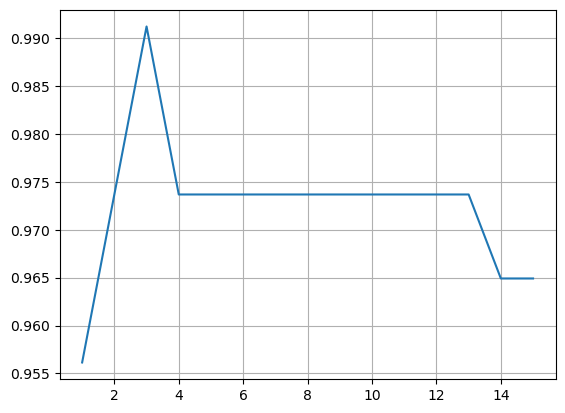

In [10]:
plt.plot(range(1,16), scores)
plt.grid()
plt.show()

## Knn Scratch

In [11]:
from collections import Counter

class Knn:
    
    def __init__(self, k=5):
        self.n_neighbors = k
        self.x_train = None
        self.y_train = None
        
    def fit(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train
    
    def predict(self, x_test):
        
        y_pred = []
        
        for i in x_test:
            
            distances = []
            
            # calculate distances
            for j in self.x_train:
                distances.append(self.calculate_distance(i,j))
                
            n_neighbors = sorted(list(enumerate(distances)), key= lambda x: x[1])[0: self.n_neighbors]
            labels = self.majority_counts(n_neighbors)
            y_pred.append(labels)
            
        return np.array(y_pred)
            
    def calculate_distance(self, point_A, point_B):
        return np.linalg.norm(point_A-point_B)
    
    def majority_counts(self, n_neighbors):
        votes = []
        for i in n_neighbors:
            votes.append(self.y_train[i[0]])
            
        votes = Counter(votes)
        return votes.most_common()[0][0]

In [12]:
apnaknn = Knn(k=5)
apnaknn.fit(X_train,y_train.values)

In [17]:
y_pred = apnaknn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

## Chossing K

In [54]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
X = df.iloc[:,2:4].values
Y = df.iloc[:, -1].values

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

x_train.shape, x_test.shape

((320, 2), (80, 2))

In [36]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [37]:
# first method ===== neuristic ==========
np.sqrt(x_train.shape[0])

17.88854381999832

In [38]:
k = 17

knn_model1 = KNeighborsClassifier(n_neighbors=k)
knn_model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [39]:
y_pred1 = knn_model1.predict(x_test)
accuracy_score(y_test, y_pred1)

0.875

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[49,  8],
       [ 2, 21]], dtype=int64)

In [63]:
# training and test/validation error

error_train = []
error_test = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    x = confusion_matrix(y_train, knn.predict(x_train))
    y = confusion_matrix(y_test, knn.predict(x_test))
    
    error_train.append((x[0][1] + x[1][0])/x.sum())
    error_test.append((y[0][1] + y[1][0])/y.sum())

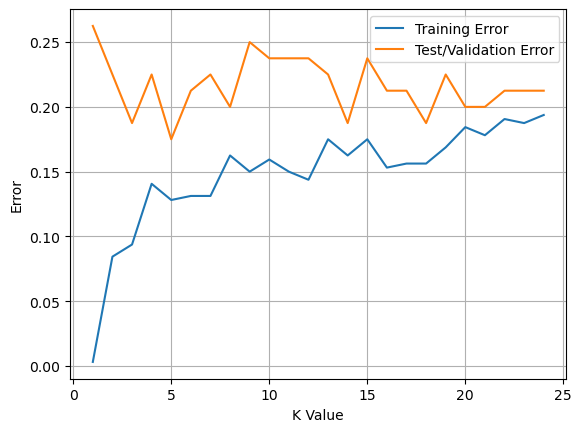

In [64]:
plt.plot(range(1,25), error_train, label="Training Error")
plt.plot(range(1,25), error_test, label="Test/Validation Error")
plt.xlabel('K Value')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()

In [65]:
final_model = KNeighborsClassifier(n_neighbors=5)
final_model.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
final_prediction = final_model.predict(x_test)
accuracy_score(y_test, final_prediction)

0.825

## Decision Boundary
1. Fit the model
2. Create meshgrid
3. classify each point of meshgrid
4. plot array as image
5. plot data

In [68]:
# step>1===== fitting the model
decision_classifier = KNeighborsClassifier(n_neighbors= 15)
decision_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [99]:
# step>2==== Creating meshgrid

a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)

In [103]:
# step>3======== classifying every point
input_labels = np.array([XX.ravel(), YY.ravel()]).T

labels = decision_classifier.predict(input_labels)

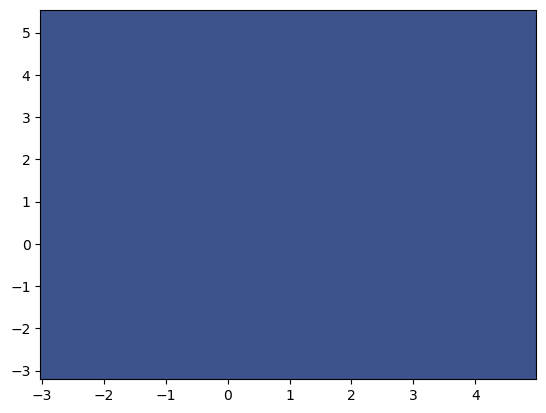

In [105]:
# step>4==== plotting array
plt.contourf(XX, YY, labels.reshape(XX.shape))